In [6]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re

In [7]:
data = pd.read_csv('C:\\Users\\mubar\\Desktop\\GitDemo\\super-duper-robot\\lesson_4.05_data.csv')

In [8]:
data.head()

,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year,GENDER,HOMEOWNR,DOMAIN_letters,RFA_frequency,RFA_monetary,AVGGIFT
0,479,307,12883,27,14,31,4.0,37.000000,F,other,T,4,E,7.741935
1,5468,1088,36175,12,13,3,18.0,52.000000,M,H,S,2,G,15.666667
2,497,251,11576,26,14,27,12.0,37.570799,M,U,R,4,E,7.481481
3,1000,386,15130,27,14,16,9.0,28.000000,F,U,R,4,E,6.812500
4,576,240,9836,43,25,37,14.0,20.000000,F,H,S,2,F,6.864865


In [9]:
data.dtypes

HV1                 int64
IC1                 int64
IC5                 int64
CARDPROM            int64
NUMPRM12            int64
NGIFTALL            int64
TIMELAG           float64
year              float64
GENDER             object
HOMEOWNR           object
DOMAIN_letters     object
RFA_frequency       int64
RFA_monetary       object
AVGGIFT           float64
dtype: object

In [10]:
# nulls = pd.DataFrame(data.isna().sum()/len(data))
# nulls= nulls.reset_index()
# nulls.columns = ['column_name', 'Percentage Null Values']
# nulls.sort_values(by='Percentage Null Values', ascending = False)

In [11]:
categoricals = data.select_dtypes(np.object)
numericals = data.select_dtypes(np.number)

In [12]:
categoricals.head()

,GENDER,HOMEOWNR,DOMAIN_letters,RFA_monetary
0,F,other,T,E
1,M,H,S,G
2,M,U,R,E
3,F,U,R,E
4,F,H,S,F


In [13]:
numericals.head()

,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year,RFA_frequency,AVGGIFT
0,479,307,12883,27,14,31,4.0,37.000000,4,7.741935
1,5468,1088,36175,12,13,3,18.0,52.000000,2,15.666667
2,497,251,11576,26,14,27,12.0,37.570799,4,7.481481
3,1000,386,15130,27,14,16,9.0,28.000000,4,6.812500
4,576,240,9836,43,25,37,14.0,20.000000,2,6.864865


In [14]:
#data['PVASTATE'].value_counts()
#data = data.drop(['PVASTATE'], axis=1)

In [15]:
#data.head()

In [16]:
#data['RECP3'].value_counts()
#data = data.drop(['RECP3'], axis=1)

In [17]:
#data.head()

In [18]:
#data['VETERANS'].value_counts()
#data = data.drop(['VETERANS'], axis=1)

In [19]:
#data.head()

In [20]:
data['HOMEOWNR'].value_counts()

H        48677
other    20276
U        19440
Name: HOMEOWNR, dtype: int64

In [21]:
def clean_homeownr(x):
    if x == " ":
        return 'other'
    else:
        return x
data['HOMEOWNR'] = list(map(clean_homeownr, data['HOMEOWNR']))
data['HOMEOWNR'].value_counts()

H        48677
other    20276
U        19440
Name: HOMEOWNR, dtype: int64

In [22]:
data['GENDER'].value_counts()

F        47547
M        36242
other     4604
Name: GENDER, dtype: int64

In [23]:
def clean_gender_col(x):
    if x in ['',' ' ,'U', 'C', 'J', 'A']:
        return 'other'
    else:
        return x
data['GENDER'] = list(map(clean_gender_col, data['GENDER']))
data['GENDER'].value_counts()

F        47547
M        36242
other     4604
Name: GENDER, dtype: int64

In [24]:
#data['MDMAUD'].value_counts()
#data = data.drop(['MDMAUD'], axis=1)

In [25]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

,GENDER,HOMEOWNR,DOMAIN_letters,RFA_monetary
0,F,other,T,E
1,M,H,S,G
2,M,U,R,E
3,F,U,R,E
4,F,H,S,F


In [31]:
data = data[data['DOMAIN_letters']!=' ']

In [32]:
data['DOMAIN_letters'].value_counts()

S    20737
R    18863
C    18683
T    18521
U    11589
Name: DOMAIN_letters, dtype: int64

In [33]:
pattern = '[UCSTR]'
re.findall(pattern, data['DOMAIN_letters'][0])

['T']

In [34]:
data['DOMAIN_letters'] = list(map(lambda x: re.findall(pattern, x)[0], data['DOMAIN_letters']))

In [35]:
data = data.drop(['DOMAIN_letters'], axis=1)

In [37]:
#data = data.drop(['STATE'], axis=1)

In [38]:
data.head()

,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year,GENDER,HOMEOWNR,RFA_frequency,RFA_monetary,AVGGIFT
0,479,307,12883,27,14,31,4.0,37.000000,F,other,4,E,7.741935
1,5468,1088,36175,12,13,3,18.0,52.000000,M,H,2,G,15.666667
2,497,251,11576,26,14,27,12.0,37.570799,M,U,4,E,7.481481
3,1000,386,15130,27,14,16,9.0,28.000000,F,U,4,E,6.812500
4,576,240,9836,43,25,37,14.0,20.000000,F,H,2,F,6.864865


In [39]:
data['RFA_monetary'].value_counts()

F    43920
E    19688
G    18228
D     6557
Name: RFA_monetary, dtype: int64

In [40]:
pattern = '\w'
re.findall(pattern, data['RFA_monetary'][0])

['E']

In [43]:
data['RFA_frequency'] = list(map(lambda x: re.findall(pattern, x)[1], data['RFA_monetary']))

IndexError: list index out of range

In [44]:
data['RFA_monetary'] = list(map(lambda x: re.findall(pattern, x)[2], data['RFA_frequency']))

TypeError: expected string or bytes-like object

In [27]:
data = data.drop(['RFA_2'], axis=1)

In [28]:
data = data.drop(['MAXADATE'], axis=1)

In [29]:
data.head()

,DOB,GENDER,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,NGIFTALL,TIMELAG,AVGGIFT,DOMAIN_letters,RFA_frequency,RFA_monetary
0,3712,F,NaN,other,479,635,3,2,307,318,349,378,12883,74,27,6,14,31,4.0,7.741935,T,4,E
1,5202,M,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,3,18.0,15.666667,S,2,G
2,0,M,3.0,U,497,546,2,1,251,292,292,340,11576,63,26,6,14,27,12.0,7.481481,R,4,E
3,2801,F,1.0,U,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,16,9.0,6.812500,R,4,E
4,2001,F,3.0,H,576,594,4,3,240,250,293,321,9836,113,43,10,25,37,14.0,6.864865,S,2,F


In [30]:
def year_clean(x):
    x = str(x)
    if len(x)<4:
        return np.nan
    else:
        pattern = '\d\d'
        yr = re.findall(pattern,x)[0]
        return int(yr)

In [31]:
data['year'] = list(map(year_clean, data['DOB']))

In [32]:
data['year'] = data['year'].fillna(np.mean(data['year']))

In [33]:
data = data.drop(['DOB'], axis=1)

In [34]:
data.head()

,GENDER,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,NGIFTALL,TIMELAG,AVGGIFT,DOMAIN_letters,RFA_frequency,RFA_monetary,year
0,F,NaN,other,479,635,3,2,307,318,349,378,12883,74,27,6,14,31,4.0,7.741935,T,4,E,37.0000
1,M,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,3,18.0,15.666667,S,2,G,52.0000
2,M,3.0,U,497,546,2,1,251,292,292,340,11576,63,26,6,14,27,12.0,7.481481,R,4,E,37.5708
3,F,1.0,U,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,16,9.0,6.812500,R,4,E,28.0000
4,F,3.0,H,576,594,4,3,240,250,293,321,9836,113,43,10,25,37,14.0,6.864865,S,2,F,20.0000


In [35]:
# sns.pairplot(data)

In [36]:
data['INCOME'] = data['INCOME'].astype('object')

In [37]:
data['INCOME'].value_counts().index

Float64Index([5.0, 2.0, 4.0, 1.0, 3.0, 6.0, 7.0], dtype='float64')

In [38]:
data['INCOME'].isna().sum()

19622

In [39]:
def clean_income(x):
    if x in [5.0, 2.0, 4.0, 1.0, 3.0, 6.0, 7.0]:
        return x
    else:
        return 'other'

In [40]:
data['INCOME'] = list(map(clean_income, data['INCOME']))
data['INCOME'].value_counts()

other    19622
5.0      14290
2.0      12179
4.0      11818
1.0       8464
3.0       7970
6.0       7161
7.0       6889
Name: INCOME, dtype: int64

In [41]:
data['RFA_frequency'] = data['RFA_frequency'].astype('object')

In [42]:
data['year'] = data['year'].astype('object')

In [43]:
data.head()

,GENDER,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,NGIFTALL,TIMELAG,AVGGIFT,DOMAIN_letters,RFA_frequency,RFA_monetary,year
0,F,other,other,479,635,3,2,307,318,349,378,12883,74,27,6,14,31,4.0,7.741935,T,4,E,37.0000
1,M,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,3,18.0,15.666667,S,2,G,52.0000
2,M,3.0,U,497,546,2,1,251,292,292,340,11576,63,26,6,14,27,12.0,7.481481,R,4,E,37.5708
3,F,1.0,U,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,16,9.0,6.812500,R,4,E,28.0000
4,F,3.0,H,576,594,4,3,240,250,293,321,9836,113,43,10,25,37,14.0,6.864865,S,2,F,20.0000


In [44]:
data['HV4'].value_counts()
data['CARDPM12'].value_counts()

6     47068
5     17441
4     15648
3      3562
2      1320
7      1246
8       757
11      388
9       378
10      251
1       247
12       35
0        19
13       17
14        5
16        4
17        4
15        2
19        1
Name: CARDPM12, dtype: int64

In [45]:
# data['NGIFTALL'].value_counts()
data['year'] = data['year'].astype('float')

In [46]:
data['HV4'] = data['HV4'].astype('object')
data['HV3'] = data['HV3'].astype('object')
data['CARDPM12'] = data['CARDPM12'].astype('object')

In [47]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

,GENDER,INCOME,HOMEOWNR,HV3,HV4,CARDPM12,DOMAIN_letters,RFA_frequency,RFA_monetary
0,F,other,other,3,2,6,T,4,E
1,M,6.0,H,12,10,6,S,2,G
2,M,3.0,U,2,1,6,R,4,E
3,F,1.0,U,2,1,6,R,4,E
4,F,3.0,H,4,3,10,S,2,F


In [64]:
numericals = data.select_dtypes(np.number)
numericals.head()

,HV1,HV2,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,AVGGIFT,year
0,479,635,307,318,349,378,12883,74,27,14,31,4.0,7.741935,37.0000
1,5468,5218,1088,1096,1026,1037,36175,32,12,13,3,18.0,15.666667,52.0000
2,497,546,251,292,292,340,11576,63,26,14,27,12.0,7.481481,37.5708
3,1000,1263,386,388,396,423,15130,66,27,14,16,9.0,6.812500,28.0000
4,576,594,240,250,293,321,9836,113,43,25,37,14.0,6.864865,20.0000


In [65]:
numericals['TIMELAG'] = numericals['TIMELAG'].fillna(np.mean(numericals['TIMELAG']))

In [299]:
y = numericals['AVGGIFT']
numericals = numericals.drop(['AVGGIFT'], axis=1)

In [300]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
flag = True
threshold = 50
while flag is True:
    flag = False
    values = [variance_inflation_factor(np.array(numericals), i) for i in np.arange(numericals.shape[1])]
    if max(values)> threshold:
        col_index = values.index(max(values))
        column_name = numericals.columns[col_index]
        numericals = numericals.drop([column_name], axis=1)
        flag = True

ModuleNotFoundError: No module named 'statsmodels'

In [301]:
numericals.head()

,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year,RFA_frequency
0,479,307,12883,27,14,31,4.0,37.000000,4
1,5468,1088,36175,12,13,3,18.0,52.000000,2
2,497,251,11576,26,14,27,12.0,37.570799,4
3,1000,386,15130,27,14,16,9.0,28.000000,4
4,576,240,9836,43,25,37,14.0,20.000000,2


In [302]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(numericals)
x_standardized = transformer.transform(numericals)

In [303]:
categoricals.head()

,GENDER,HOMEOWNR,RFA_monetary
0,F,other,E
1,M,H,G
2,M,U,E
3,F,U,E
4,F,H,F


In [304]:
categoricals['HV3'].value_counts()

KeyError: 'HV3'

In [305]:
categoricals = categoricals.drop(['HV3', 'HV4', 'INCOME', 'CARDPM12'], axis=1)

KeyError: "['HV3' 'HV4' 'INCOME' 'CARDPM12'] not found in axis"

In [306]:
from sklearn.preprocessing import OneHotEncoder

In [307]:
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals)
encoded = encoder.transform(categoricals).toarray()

In [279]:
X = np.concatenate((x_standardized, encoded), axis=1)

In [280]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
r2_score(y_test, predictions)

LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
r_squared = r2_score(y_test, predictions)

In [ ]:
r_squared

In [ ]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=4)
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [286]:
from sklearn.metrics import mean_squared_error

In [287]:
from sklearn.neighbors import KNeighborsRegressor
scores = []
for i in range(5,40,3):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'Accuracy')

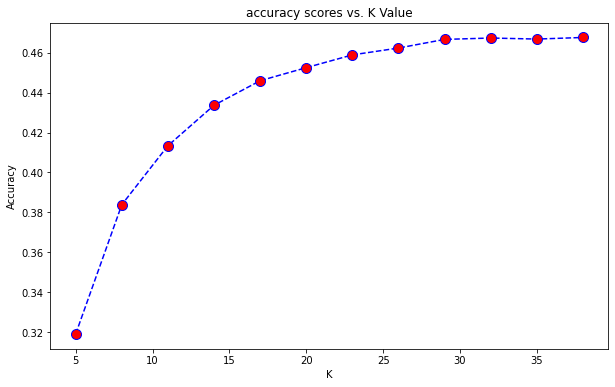

In [266]:
plt.figure(figsize=(10,6))
plt.plot(range(5,40,3),scores,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [ ]:
# clean_data = pd.concat([numericals, categoricals, y], axis=1)

In [ ]:
# clean_data.to_csv('Lesson_4.05_data.csv')

In [288]:
complexities = []
for i in range(5,40,3):
    complexities.append(np.log(1/i))

In [289]:
complexities

[-1.6094379124341003,
 -2.0794415416798357,
 -2.3978952727983707,
 -2.639057329615259,
 -2.833213344056216,
 -2.995732273553991,
 -3.1354942159291497,
 -3.258096538021482,
 -3.367295829986474,
 -3.4657359027997265,
 -3.5553480614894135,
 -3.6375861597263857]

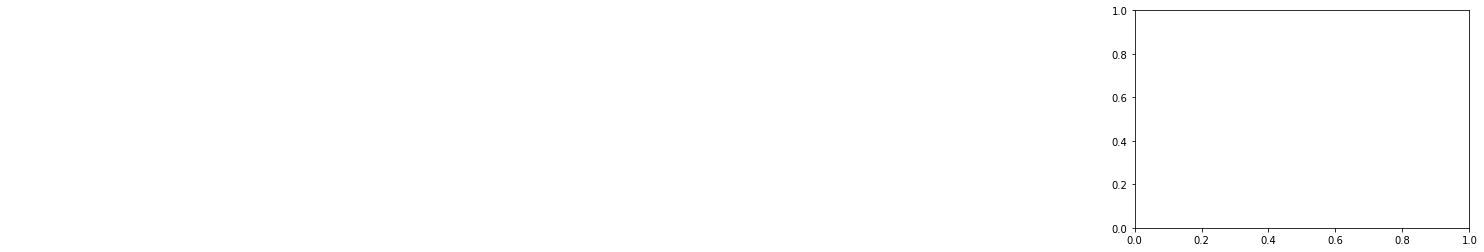

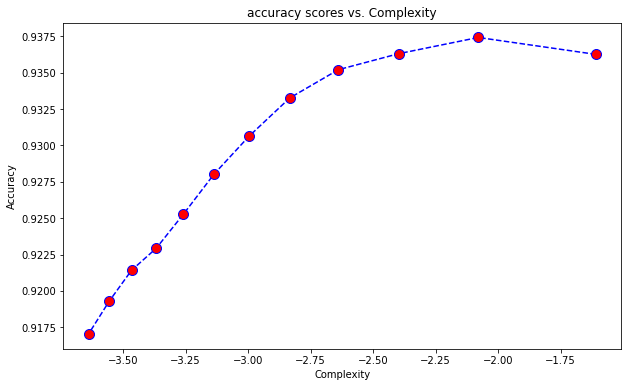

In [290]:
fig, ax = plt.subplots(1,1)

plt.figure(figsize=(10,6))
plt.plot(complexities,scores,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. Complexity')
plt.xlabel('Complexity')
plt.ylabel('Accuracy')

k = np.arange(5,40,4)
for i, txt in enumerate(k):
    ax.annotate(txt, (complexities[i], scores[i]))

In [291]:
np.log(1/40)

-3.6888794541139363